<div class='alert alert-info'>
    <h1 align="center">K-fold Cross-Validation</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

K-fold cross-validation is a technique used in machine learning for model evaluation and selection, especially when dealing with a limited dataset. The process involves partitioning the training dataset into `k` subsets of approximately equal size. Then, the model is trained $k$ times, each time using $k-1$ subsets as training data and the remaining subset as validation data.

K-fold cross-validation is extremely useful for hyperparameter tuning. Hyperparameters are parameters set before the training process and cannot be directly learned from the data. Examples of hyperparameters include learning rate, regularization strength, the number of hidden layers in a neural network, etc.

Here's a step-by-step explanation of the process:

- **Partitioning:** The dataset is divided into $k$ subsets or folds. Each fold should ideally have roughly the same size and should be selected randomly or with some specific method to ensure they represent the entire dataset.

- **Training-Validation Iterations:** The model is trained $k$ times. Each iteration uses one of the k folds as the validation set, while the remaining $k-1$ folds are combined to form the training set. This means each fold gets a turn as the validation set while the others are used for training.

- **Model Training and Evaluation:** The model is trained on the training data for each iteration and then evaluated on the validation data. Evaluation metrics such as accuracy, precision, recall, or others are computed for each iteration.

- **Aggregating Results:** After all $k$ iterations, the evaluation metrics from each fold are typically averaged to obtain a single evaluation metric for the model. This average performance metric gives a more robust estimate of the model's performance than training on a single data split.

- **Final Model Selection:** Once cross-validation is complete, you may choose to select the model with the best average performance metric across all folds as your final model. Alternatively, you might perform additional steps like hyperparameter tuning using cross-validation.

K-fold cross-validation helps mitigate issues related to the randomness of the data split, providing a more reliable estimate of a model's performance compared to a single train-test split. It also allows for better utilization of available data, especially when the dataset is small. However, it can be computationally expensive, mainly when dealing with large datasets or complex models.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## KFold
Let's use an example with `NumPy` and scikit-learn's `KFold` to see how the data is split into training and validation sets using 5-fold cross-validation.

Explanation of the following code:
- The data (X1) has 10 rows (samples) and 2 columns (features).
- `KFold` with 5 splits divides the data into 5 folds.
- For each fold, it prints the indices corresponding to the training set and the validation set. The indices represent the row numbers of the data matrix X1.

In [2]:
# a random example to see how k-fold splits the data
X1 = np.random.randn(10, 2)
cv = KFold(n_splits=5)

for i, (train_idx, val_idx) in enumerate(cv.split(X1),1):
    print('Fold %d: ' %i,
          'Train indices =', train_idx, ' | ',
          'Validation indices =', val_idx)

Fold 1:  Train indices = [2 3 4 5 6 7 8 9]  |  Validation indices = [0 1]
Fold 2:  Train indices = [0 1 4 5 6 7 8 9]  |  Validation indices = [2 3]
Fold 3:  Train indices = [0 1 2 3 6 7 8 9]  |  Validation indices = [4 5]
Fold 4:  Train indices = [0 1 2 3 4 5 8 9]  |  Validation indices = [6 7]
Fold 5:  Train indices = [0 1 2 3 4 5 6 7]  |  Validation indices = [8 9]


You can observe that each fold contains a different set of indices for both training and validation, as expected in k-fold cross-validation. This ensures that each data point gets a chance to be in the validation set exactly once across all folds.

## StratifiedKFold

When dealing with classification tasks where the classes are imbalanced, it's often beneficial to ensure that the class distribution is preserved across folds. `StratifiedKFold` from scikit-learn does exactly that. It divides the dataset into folds while ensuring that each fold has approximately the same proportion of samples from each class as the original dataset.

Explanation of the following code:
- `StratifiedKFold` ensures that each fold has approximately the same proportion of samples from each class as the original dataset.
- In each fold, both training and validation sets contain a balanced number of samples from both classes.
- The train and validation indices and their corresponding labels are printed for each fold.

This ensures that the class distribution is preserved across folds, which is crucial for reliable model evaluation, especially in class imbalance.

In [3]:
# the folds are made by preserving the percentage of samples for each class.
X2 = np.random.randn(9, 2)
y2 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = StratifiedKFold(n_splits=3)

for i, (train_idx, val_idx) in enumerate(cv.split(X2, y2), 1):
    print('Fold %d: ' %i,
          'Train indices =', train_idx, ' | ',
          'Validation indices =', val_idx)
    print('%19s' %'y lables =',
          '%18s' %y2[train_idx], ' | ',
          '%28s' %y2[val_idx])
    print()

Fold 1:  Train indices = [1 2 5 6 7 8]  |  Validation indices = [0 3 4]
         y lables =      [0 0 1 1 1 1]  |                       [0 1 1]

Fold 2:  Train indices = [0 2 3 4 7 8]  |  Validation indices = [1 5 6]
         y lables =      [0 0 1 1 1 1]  |                       [0 1 1]

Fold 3:  Train indices = [0 1 3 4 5 6]  |  Validation indices = [2 7 8]
         y lables =      [0 0 1 1 1 1]  |                       [0 1 1]



Let's try K-fold for the second example.

When you use `KFold` with `split(X, y)` where `y` represents the target variable (labels), it will not consider the class distribution. Instead, it will simply split the data indices into folds without considering the target variable.

In [4]:
X2 = np.random.randn(9, 2)
y2 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = KFold(n_splits=3)

for i, (train_idx, val_idx) in enumerate(cv.split(X2, y2), 1):
    print('Fold %d: ' %i,
          'Train indices =', train_idx, ' | ',
          'Validation indices =', val_idx)
    print('%19s' %'y lables =',
          '%18s' %y2[train_idx], ' | ',
          '%28s' %y2[val_idx])
    print()

Fold 1:  Train indices = [3 4 5 6 7 8]  |  Validation indices = [0 1 2]
         y lables =      [1 1 1 1 1 1]  |                       [0 0 0]

Fold 2:  Train indices = [0 1 2 6 7 8]  |  Validation indices = [3 4 5]
         y lables =      [0 0 0 1 1 1]  |                       [1 1 1]

Fold 3:  Train indices = [0 1 2 3 4 5]  |  Validation indices = [6 7 8]
         y lables =      [0 0 0 1 1 1]  |                       [1 1 1]



Unlike `StratifiedKFold`, `KFold` doesn't ensure the class distribution is preserved across folds. Therefore, it might not be suitable for evaluating models, especially when class distribution is imbalanced. In such cases, `StratifiedKFold` is preferred.

# Hyperparameter Tuning

Here's how k-fold cross-validation aids in hyperparameter tuning:

- **Parameter Tuning:** During each iteration of k-fold cross-validation, a model is trained with a specific set of hyperparameters on $k-1$ folds of the data and then validated on the remaining fold. This process is repeated for each combination of hyperparameters being considered.

- **Performance Evaluation:** The performance metric (e.g., accuracy, F1 score) is computed after training and validating the model on each fold. These metrics are then averaged across all folds to estimate how well the model performs with the given set of hyperparameters.

- **Hyperparameter Selection:** Once cross-validation is complete for all hyperparameter combinations, the set of hyperparameters that yields the best average performance metric across all folds is typically chosen as the optimal set. This set of hyperparameters can then be used to train the final model on the entire dataset.

- **Avoiding Overfitting:** Using multiple folds for training and validation, k-fold cross-validation helps ensure that the model's performance is more representative of its generalization ability. It helps to avoid overfitting to a particular train-test split of the data, which is particularly important when tuning hyperparameters.

Overall, k-fold cross-validation is a robust method for hyperparameter tuning because it provides a more reliable estimate of a model's performance than a single train-test split. It helps to ensure that the selected hyperparameters generalize well to unseen data, leading to better-performing models.

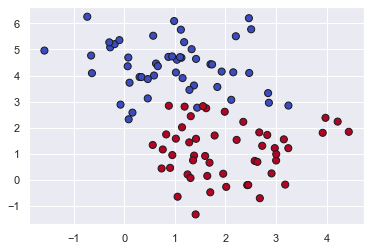

In [5]:
# creat a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm);

In [6]:
# split the dataset into train and test datsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

In [7]:
# create an SVM classifier with a linear kernel when C=1
clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)

In [8]:
# print the model score on test data
print('test score =', clf.score(X_test, y_test))

test score = 0.96


Let's compute the cross-validated scores for a classifier (clf) using 5-fold cross-validation (cv=5).

After computing the scores for each fold, the code calculates and prints the scores' mean accuracy and standard deviation. By printing the mean accuracy and standard deviation, you get an idea of the average performance of the classifier and how consistent its performance is across different folds. This information helps assess the robustness and generalization capability of the classifier.

In [9]:
# computing 5 scores for 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)

for i in range(1,6):
    print('Fold %d accuracy:' %i, '%.4f' %scores[i-1])

print('\nThe mean accuracy is %0.4f with a standard deviation of %0.4f'
      % (scores.mean(), scores.std()))

Fold 1 accuracy: 0.8667
Fold 2 accuracy: 0.8667
Fold 3 accuracy: 0.9333
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.8667

The mean accuracy is 0.9067 with a standard deviation of 0.0533


## Search Hyperparameter Space
There are two generic approaches to searching the hyperparameter space for the best cross-validation score:
* `GridSearchCV` exhaustively considers all parameter combinations for given values.
* `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

In [10]:
# 1: split data to train and validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyperparameters
C_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9) # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5

param_grid = dict(gamma=gamma_range, C=C_range)

# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid.fit(X_train, y_train)

# 5: print the best hyperparameters found by the grid search
print('The best parameters are %s with a score of %0.2f'
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.99


## Validation Accuracy Visualization

This code snippet visualizes the validation accuracy obtained from the grid search over the hyperparameters `C` and `gamma` using a heatmap.

This visualization allows you to identify regions of high and low validation accuracy across different combinations of `C` and `gamma`, aiding in interpreting the hyperparameter tuning results.

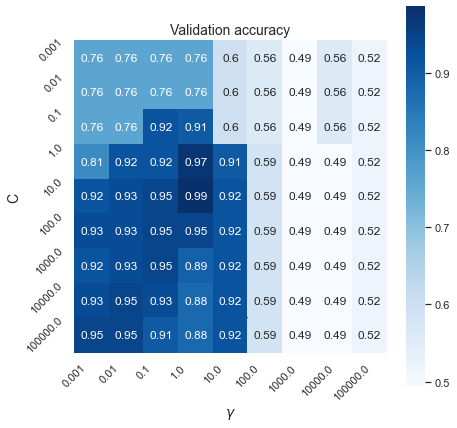

In [11]:
# retrieve the mean test scores from the (cv_results_) attribute of the object (grid)
scores = grid.cv_results_['mean_test_score']

# reshape the mean test scores into a 2D array
scores = np.reshape(scores, (len(C_range),len(gamma_range)))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
sns.heatmap(scores, annot=True, cmap='Blues', square=True)

plt.xlabel('$\gamma$', fontsize=14)
plt.ylabel('C', fontsize=14)

plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=45)

plt.title('Validation accuracy', fontsize=14)
plt.show()

The `grid.cv_results_` attribute provides detailed information about the results of the cross-validation process, including scores, parameters, and computation times for each hyperparameter combination. It's a dictionary-like object with various keys containing arrays or lists of values.

Here's a brief explanation of some key information in the grid.cv_results_:

- `'mean_test_score'`: Each hyperparameter combination's mean test score (accuracy by default).
- `'std_test_score'`: Standard deviation of the test scores across all folds for each hyperparameter combination.
- `'params'`: Hyperparameter settings for each model trained during cross-validation.
- `'rank_test_score'`: Rank of each hyperparameter combination based on mean test score.

Other keys may include `'mean_fit_time'`, `'mean_score_time'`, `'std_fit_time'`, `'std_score_time'`, etc., providing information about the computation time for fitting and scoring models.

In [12]:
print(grid.cv_results_.keys()) # print the list of keys

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [13]:
# Print some key information for the first few hyperparameter combinations
print("Some key information for the first few hyperparameter combinations:\n")

# print some key information for a few hyperparameter combinations
for i in range(38,41):
    print('Hyperparameters: %s\n'   %grid.cv_results_['params'][i],
          'Mean Test Score: %.4f\n' %grid.cv_results_['mean_test_score'][i],
          'Std Test Score: %.4f\n'  %grid.cv_results_['std_test_score'][i], 
          'Rank: %d\n' %grid.cv_results_['rank_test_score'][i])

Some key information for the first few hyperparameter combinations:

Hyperparameters: {'C': 10.0, 'gamma': 0.1}
 Mean Test Score: 0.9467
 Std Test Score: 0.0653
 Rank: 3

Hyperparameters: {'C': 10.0, 'gamma': 1.0}
 Mean Test Score: 0.9867
 Std Test Score: 0.0267
 Rank: 1

Hyperparameters: {'C': 10.0, 'gamma': 10.0}
 Mean Test Score: 0.9200
 Std Test Score: 0.0777
 Rank: 21



Let's visualize the decision boundaries of the Support Vector Classifiers (SVCs) trained with different combinations of hyperparameters `C` and `gamma`. It plots contour plots of the decision function over a 2D grid of feature space.

First, we must create Support Vector Classifier (SVC) instances with different combinations of the hyperparameters `C` and `gamma`. Each combination is specified by iterating the provided ranges for `C` and `gamma` and creating an SVC instance with the corresponding values. After executing this code, each element in the 'classifier' list will consist of the trained classifier 'clf', its corresponding `C` value, and its corresponding `gamma` value. 

In [14]:
C_range = [0.1, 10, 1000]
gamma_range = [0.1, 1, 10]

classifiers = []

for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma).fit(X_train, y_train)
        classifiers.append((clf, clf.score(X_test, y_test), C, gamma))

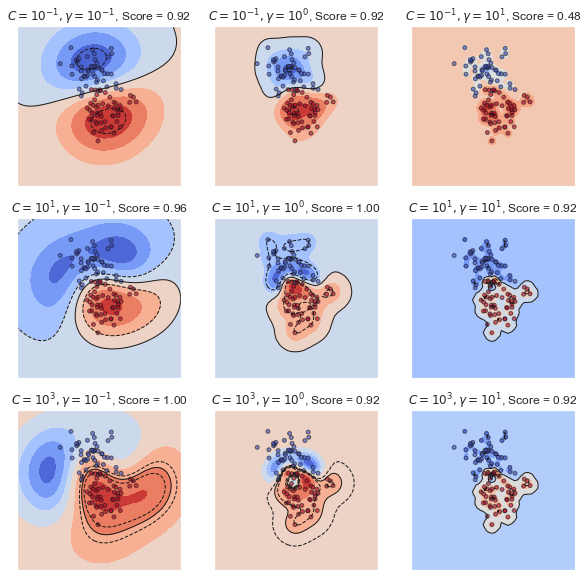

In [15]:
plt.figure(figsize=(10, 10))

# create a grid for visualization
U, V = np.meshgrid(np.linspace(-5, 8, 50), np.linspace(-5, 8, 50))

# iterate over each classifier
for i, (clf, score, C, gamma) in enumerate(classifiers):
    
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[U.ravel(), V.ravel()])
    Z = Z.reshape(U.shape)

    # visualize the decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), i + 1)

    plt.title('$C = 10^{%d}, \gamma = 10^{%d}$, Score = %.2f'
              %(np.log10(C), np.log10(gamma), score))

    # visualize the parameter's effect on the decision function
    
    # filled contour plot
    plt.contourf(U, V, Z, cmap=plt.cm.coolwarm)
    
    # contour lines
    plt.contour(U, V, Z, linewidths=1, colors='k',
                levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, edgecolors='k',
                cmap=plt.cm.coolwarm, alpha=0.6)
    
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show()

# Face Recognition Example

Let's use the Labeled Faces in the People dataset (LFW), which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn.

In [16]:
from sklearn.datasets import fetch_lfw_people

In [17]:
# load LFW Faces Dataset for only people with at least 80 images 
faces = fetch_lfw_people(min_faces_per_person=80)

print('Target Names:', faces.target_names)
print('Images Shape:', faces.images.shape)

Target Names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
Images Shape: (1140, 62, 47)


Each image contains [62×47] or nearly 3,000 pixels.

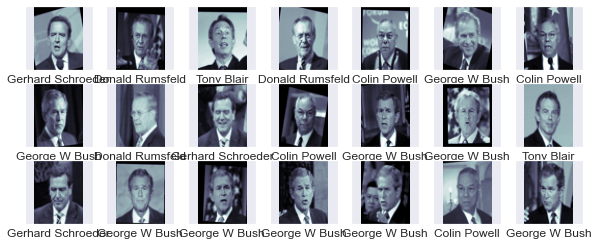

In [18]:
# visualize a subset of images from the LFW dataset
plt.figure(figsize=(10, 4))

# iterate over the first 21 images
for i in range(1, 22):
    # create a subplot in a 3x7 grid
    plt.subplot(3, 7, i)
    
    # display the i-th image with bone colormap
    plt.imshow(faces.images[i], cmap='bone')
    
    # remove tick marks
    plt.xticks(())
    plt.yticks(())
    
    # set label for x-axis with target name (individual's name)
    plt.xlabel(faces.target_names[faces.target[i]], fontsize=12)
    
    # ensure equal aspect ratio
    plt.axis('equal')
    
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                    random_state=42)

After running the following code, you'll get the best hyperparameters found by the grid search, which can then be used to train the final SVC model. Using cross-validation, these hyperparameters are selected based on their performance on the training data.

In [20]:
# define cross-validation strategy (Stratified KFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define parameter grid for hyperparameter search
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

# initialize GridSearchCV with SVC classifier and parameter grid
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# perform grid search on training data
grid.fit(X_train, y_train)

# print best hyperparameters found
print(grid.best_params_)

{'C': 50, 'gamma': 0.0005}


In [21]:
# obtain the best estimator from the grid search
model = grid.best_estimator_

# make predictions on the test data
y_pred = model.predict(X_test)

After running this code, (y_pred) will contain the predicted labels for the test data based on the best model obtained through hyperparameter tuning. These predicted labels can then be used for evaluation or further analysis.

In [22]:
# print model evaluation scores
print('accuracy score: %.4f' %model.score(X_test,y_test))

accuracy score: 0.8667


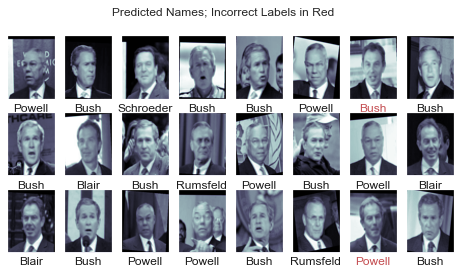

In [23]:
# create a figure for plotting
plt.figure(figsize=(8, 4))

# iterate over a subset of test images (indices 1 to 24)
for i in range(1, 25):
    
    # create a subplot in a 3x8 grid
    plt.subplot(3, 8, i)
    
    # display the i-th test image with bone colormap
    plt.imshow(X_test[i].reshape(62,47), cmap='bone')
    
    # remove tick marks
    plt.xticks(())
    plt.yticks(())
    
    # set label for x-axis with predicted label (individual's name)
    plt.xlabel(faces.target_names[y_pred[i]].split()[-1], fontsize=12,
               color='k' if y_pred[i] == y_test[i] else 'r')
    
    # ensure equal aspect ratio
    plt.axis('equal')
    
    # set title for the entire plot
    plt.suptitle('Predicted Names; Incorrect Labels in Red', size=12)

Let's count the number of class labels in the training dataset.

In [26]:
def plotBar(labels):
    # create the count plot using Seaborn
    ax = sns.countplot(x=labels, )
    
    # set the tick labels for the x-axis
    ax.set_xticklabels(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
                        'Gerhard Schroeder', 'Tony Blair'])
    
    # rotate the x-axis tick labels by 20 degrees to prevent overlap
    plt.xticks(rotation=45)
    
    # get the heights of the bars
    heights = []
    for bar in plt.gca().patches:
        heights.append(int(bar.get_height()))


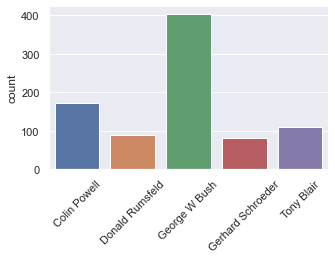

In [27]:
plt.figure(figsize=(5,3))
plotBar(y_train)

Since the training dataset is imbalanced, we can use techniques such as undersampling or oversampling. These are techniques used in the context of imbalanced datasets, where one class (the minority class) is significantly underrepresented compared to another class (the majority class). These techniques are employed to address the imbalance and improve the performance of machine learning models.

Undersampling reduces the number of instances in the majority class while oversampling increases the number of instances in the minority class. The choice between undersampling and oversampling depends on the specific characteristics of the dataset and the desired balance between addressing class imbalance and preserving information. Additionally, it's often beneficial to experiment with different ratios of undersampling or oversampling and evaluate their impact on model performance using techniques such as cross-validation.

Here's an explanation of each:

**Undersampling:**

- Undersampling involves reducing the number of instances in the majority class to balance the dataset with the minority class.
- It randomly selects a subset of instances from the majority class so that the number of instances in both classes becomes more balanced.
- Undersampling can be a simple and effective way to address the class imbalance, especially when the dataset is large and the majority class has many redundant instances.
- However, undersampling may discard potentially useful information from the majority class, leading to loss of information and potentially poorer generalization performance.

**Oversampling:**

- Oversampling involves increasing the number of instances in the minority class to balance the dataset.
- It creates synthetic instances for the minority class to match the number of instances in the majority class.
- Common oversampling techniques include:
    - `RandomOverSampler`: Randomly replicating instances from the minority class.
    - `SMOTE` (Synthetic Minority Over-sampling Technique): Generating synthetic instances by interpolating between existing minority class instances.
- Oversampling helps prevent the loss of information from the minority class and allows the model to learn more effectively from the available data.
- However, oversampling may also introduce noise or overfitting, especially if the synthetic instances are not well-represented or the dataset is already small.

In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Undersampling
Let's try undersampling through `RandomUnderSampler`.

In [29]:
# undersampling
rus = RandomUnderSampler(random_state=42)

# undersample the majority of class instances in the training data
X1, y1 = rus.fit_resample(X_train, y_train)

### Oversampling
Let's try oversampling through `SMOTE`.

In [30]:
# oversampling
sm = SMOTE (random_state=42)

# apply SMOTE oversampling to the training data
X2, y2 = sm.fit_resample(X_train, y_train)

### Compare the datasets after applying undersampling and oversampling

In [31]:
from collections import Counter

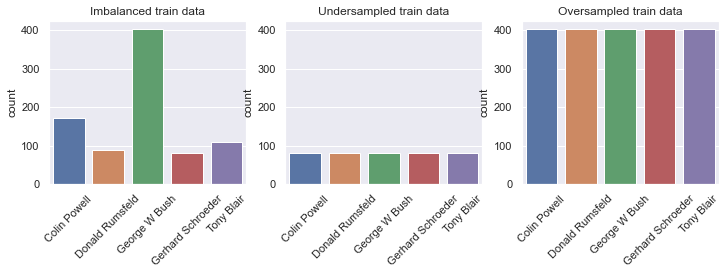

In [33]:
# define the maximum y-axis limit
ylim = max(list(Counter(y_train).values())) + 20

# create the figure with three subplots
plt.figure(figsize=(12,3))

# plot the first subplot for the imbalanced train data
plt.subplot(1,3,1)
plotBar(y_train)
plt.ylim([0, ylim])
plt.title('Imbalanced train data')

# plot the second subplot for the undersampled train data
plt.subplot(1,3,2)
plotBar(y1)
plt.ylim([0, ylim])
plt.title('Undersampled train data')

# plot the third subplot for the oversampled train data
plt.subplot(1,3,3)
plotBar(y2)
plt.ylim([0, ylim])
plt.title('Oversampled train data')

plt.show()

### Train the model

In [34]:
# create an SVC classifier and fit it to the undersampled training data
clf = SVC(C=50, gamma=.0005).fit(X1, y1)

# print model evaluation scores
print('model score after undersampling: %.4f' %model.score(X_test,y_test))

model score after undersampling: 0.8667


In [35]:
# create an SVC classifier and fit it to the oversampled training data
clf = SVC(C=50, gamma=.0005).fit(X2, y2)

# print the accuracy score
print('model score after oversampling: %.4f' %model.score(X_test, y_test))

model score after oversampling: 0.8667


Both oversampling and undersampling aim to balance the class distribution in the training data. This can help mitigate the issues caused by class imbalance, such as biased predictions towards the majority class. However, the effectiveness of each technique depends on various factors, such as the dataset size, the nature of the imbalanced classes, and the choice of the algorithm.

The accuracy of our model did not change after applying undersampling or oversampling. It is possible that the accuracy of imbalanced data will remain the same after applying oversampling or undersampling techniques. There are several reasons why this might occur:

- **Dataset Characteristics:** In some cases, the imbalanced nature of the dataset may not significantly affect the model's ability to learn the underlying patterns. If the minority class is well-separated from the majority class in feature space and is easily distinguishable, then the model may achieve high accuracy even with imbalanced data.

- **Model Complexity:** The model's complexity can also impact performance. If the model is sufficiently complex and capable of capturing the underlying patterns in the data, it may perform well even with imbalanced classes.

- **Evaluation Metric:** Accuracy is just one evaluation and may not be the most suitable metric for imbalanced datasets. Other metrics such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC) may provide a more comprehensive assessment of the model's performance, especially in the presence of class imbalance.

- **Randomness:** The performance of machine learning models can be influenced by randomness introduced during training and evaluation processes, such as random initialization of model parameters, random sampling during cross-validation, or randomness in data splitting. As a result, it's possible that the accuracy of imbalanced, undersampledled and oversampled data may fluctuate across different runs.

- **Dataset Size:** The dataset's size and the degree of class imbalance can also impact the effectiveness of oversampling and undersampling techniques. If the dataset is small or the minority class is severely underrepresented, it may be challenging for these techniques to improve model performance significantly.

- **Hyperparameters:** The choice of hyperparameters, including those related to the oversampling or undersampling techniques themselves (e.g., the sampling ratio, neighborhood size in SMOTE), can influence the model's performance. Suboptimal hyperparameter settings may lead to minimal improvement in accuracy.